In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder

In [55]:
data, labels = make_circles(n_samples=1000, random_state=0, noise=0.2, factor=0.3)
print(data.shape, labels.shape)

(1000, 2) (1000,)


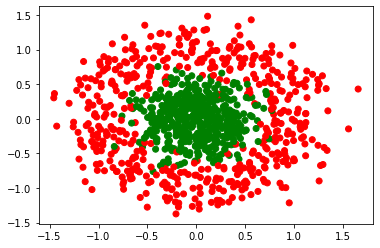

In [56]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

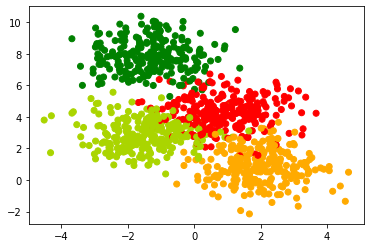

In [5]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap = my_cmap)
plt.show()

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)

In [0]:
enc = OneHotEncoder()

In [17]:
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train, 1)).toarray()
Y_OH_val = enc.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(Y_OH_train.shape)

(750, 4)


In [0]:
class GenericFFN:
  def __init__(self, n_inputs, hidden_size = [2]):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_size)
    self.sizes = [self.nx] + hidden_size + [self.ny]
    self.W, self.B = {}, {}
    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
    
  def sigmoid(self, x):
    return 1. / (1. + np.exp(-x))

  def forward_pass(self, x):
    self.A, self.H = {}, {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i + 1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    #self.A[self.nh+1] = np.matmul(self.H[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    #self.H[self.nh+1] = self.sigmoid(self.A[self.nh+1])
    return self.H[self.nh+1]

  def grad_sigmoid(self, x):
    return x*(1-x)

  def grad(self, x, y):
    self.forward_pass(x)
    self.dW, self.dB, self.dH, self.dA ={}, {}, {}, {}
    i = self.nh+1
    self.dA[self.nh+1] = self.H[self.nh+1] - y
    for k in range(i, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs = 100, eta = 0.5):
    loss = {}
    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1]) / 2
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))

    for e in tqdm_notebook(range(epochs), total = epochs, unit ="epoch"):
      dW, dB = {}, {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
      
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= eta * dW[i+1] / m
        self.B[i+1] -= eta * dB[i+1] / m

      Y_pred = self.predict(X)
      loss[e] = mean_squared_error(Y, Y_pred)
    plt.plot(list(loss.values()))
    plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X:
      res = self.forward_pass(x)
      Y_pred.append(res)
    return np.array(Y_pred).squeeze()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


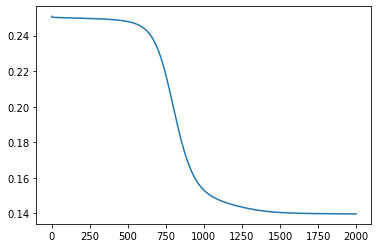

In [72]:
ffn = GenericFFN(2)
ffn.fit(X_train, Y_train, epochs = 2000, eta = 0.7)

In [73]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5)
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5)
print(accuracy_score(Y_pred_binarised_train, Y_train))
print(accuracy_score(Y_pred_binarised_val, Y_val))

0.8106666666666666
0.764


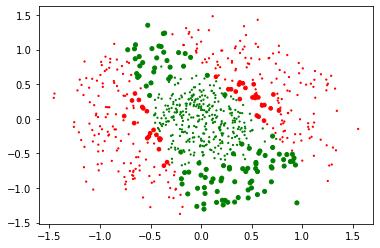

In [74]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_pred_binarised_train, cmap = my_cmap, s = 15 * np.abs(np.sign(Y_pred_binarised_train - Y_train)+.1))
plt.show()